In [2]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns

In [3]:
data = pd.read_csv('./data/rsr_from_master.csv')
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data = data[(data['Kmer Size'] ==28)]
data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Tool,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency
9,9,bfc_SRR1543965_raw_28.corrected.fastq.gz,run.bfc.sh,28,2745,39954,3754,116,131,0,...,Bfc,NaN,100,0.470944,0.972886,0.457819,0.999424,RSR,0.0,NaN
24,24,bfc_SRR1543964_raw_28.corrected.fastq.gz,run.bfc.sh,28,2633,39813,3909,140,205,0,...,Bfc,NaN,100,0.420974,0.964029,0.405266,0.999271,RSR,0.0,NaN
32,34,bfc_SRR1543966_raw_28.corrected.fastq.gz,run.bfc.sh,28,2401,41335,2437,78,449,0,...,Bfc,NaN,100,0.531797,0.907239,0.477423,0.999595,RSR,0.0,NaN
42,56,bfc_SRR1543967_raw_28.corrected.fastq.gz,run.bfc.sh,28,2401,41170,2307,74,748,0,...,Bfc,NaN,100,0.548956,0.857010,0.457364,0.999584,RSR,0.0,NaN
58,84,bfc_SRR1543968_raw_28.corrected.fastq.gz,run.bfc.sh,28,2542,41273,2672,73,140,0,...,Bfc,NaN,100,0.516639,0.969732,0.500514,0.999556,RSR,0.0,NaN


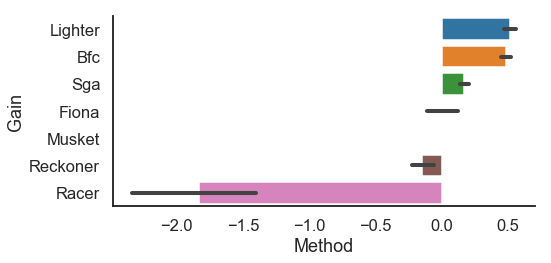

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

ranks = data.groupby("Tool")['Base Gain'].mean().sort_values()[::-1].index


#g = sns.barplot(x="Tool", y="Base Gain", data=data,order=ranks)
g=sns.catplot(x="Base Gain",y="Tool",kind='bar',data=data,order=ranks,height=4,aspect=2)



g.set(xlabel='Method', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("gain_TCR_real.png", bbox_inches='tight')

In [39]:
data_mean = data.groupby('Tool', as_index=False).mean()

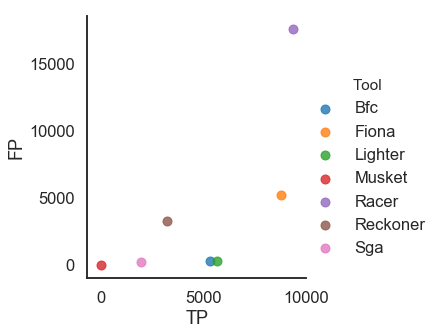

In [41]:
data['TP_100K']=data['Base - TP']
data['FP_100K']=data['Base - FP']
data['FN_100K']=data['Base - FN']

markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data_mean, x='TP_100K', y='FP_100K', hue='Tool',fit_reg=False)
g.set(xlabel='TP', ylabel='FP')
g=sns.despine()
#plt.show(g)
plt.savefig("TP_vs_FP_TCR_real.png", bbox_inches='tight')

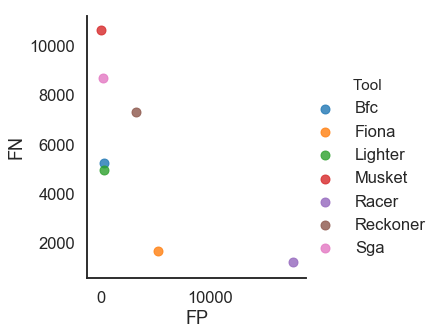

In [43]:
data['TP_100K']=data['Base - TP']
data['FP_100K']=data['Base - FP']
data['FN_100K']=data['Base - FN']

markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data_mean, x='FP_100K', y='FN_100K', hue='Tool',fit_reg=False)
g.set(xlabel='FP', ylabel='FN')
g=sns.despine()
#plt.show(g)
plt.savefig("FP_vs_FN_TCR_real.png", bbox_inches='tight')

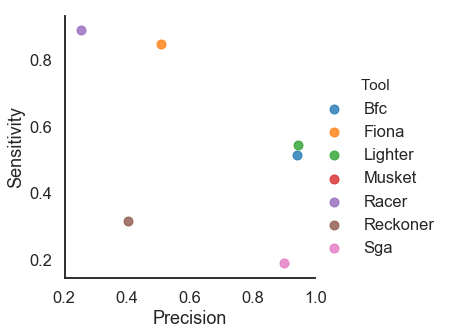

In [44]:
data['TP_100K']=data['Base - TP']
data['FP_100K']=data['Base - FP']
data['FN_100K']=data['Base - FN']

markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data_mean, x='Base Precision', y='Base Sensitivity', hue='Tool',fit_reg=False)
g.set(xlabel='Precision', ylabel='Sensitivity')
g=sns.despine()
#plt.show(g)
plt.savefig("Precision_vs_Sensitivity_TCR_real.png", bbox_inches='tight')

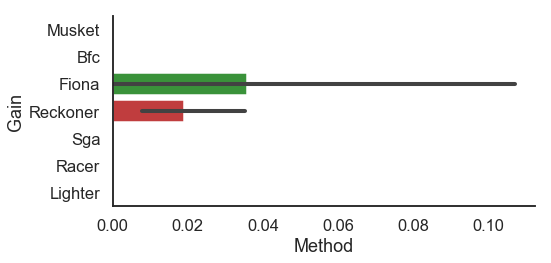

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

ranks = data.groupby("Tool")['Trim Effeciency'].mean().sort_values()[::-1].index


#g = sns.barplot(x="Tool", y="Base Gain", data=data,order=ranks)
g=sns.catplot(x="Trim Effeciency",y="Tool",kind='bar',data=data,order=ranks,height=4,aspect=2)



g.set(xlabel='Method', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("Trim_Effeciency_real.png", bbox_inches='tight')